# Part 1: Small World Networks


## Exercises about chapter 3, sections 3.5-3.10

_See personal notes in Obsidian_


## Exercises about Watts-Strogatz (WS) model


Shortest path of graph p=0: 37.88
Shortest path of graph p=0.1: 6.60
Shortest path of graph p=1: 4.32

Average distance of graph p=0: 62.88
Standard deviation of shortest path for p=0: 0.00
Average distance of graph p=0.01: 22.40
Standard deviation of shortest path for p=0.01: 3.21
Average distance of graph p=0.03: 12.66
Standard deviation of shortest path for p=0.03: 0.91
Average distance of graph p=0.04: 11.32
Standard deviation of shortest path for p=0.04: 0.92
Average distance of graph p=0.1: 7.70
Standard deviation of shortest path for p=0.1: 0.29
Average distance of graph p=0.2: 6.09
Standard deviation of shortest path for p=0.2: 0.12


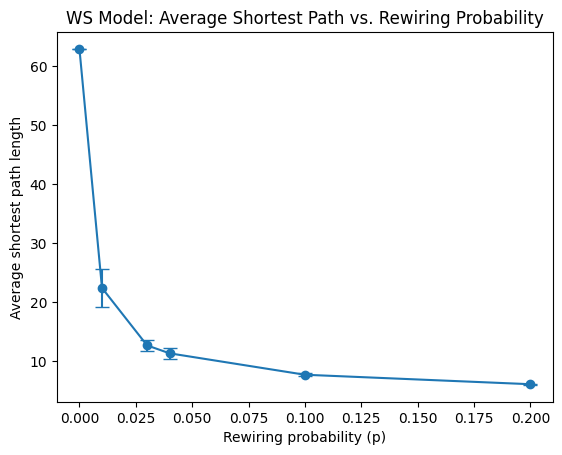

In [32]:
import networkx as nx
import numpy as np
from matplotlib import pyplot

# Network properties
N = 300
k = 4
p_values = [0, 0.1, 1]

# Exercise 1.1

# Create WS graphs for different p values
WS_graphs = {}
for p in p_values:
    WS_graphs[p] = nx.watts_strogatz_graph(N, k, p)

# Calculates shortest path of the 3 graphs
for g in WS_graphs:
    # print(
    #     "Shortest path of graph with p=",
    #     format(g),
    #     ": {:.2f}".format(nx.average_shortest_path_length(WS_graphs[g])),
    #     sep="",
    # )
    print(
        f"Shortest path of graph p={g}: {nx.average_shortest_path_length(WS_graphs[g]):.2f}"
    )

# Exercise 1.3

# Extended sweep over p values
"""
dense_p_values = [i / 100 for i in range(0, 101)]  # 0.00 ... 1.00
ws_path_lengths = {}

for p in dense_p_values:
    G_tmp = nx.watts_strogatz_graph(N, k, p)
    ws_path_lengths[p] = nx.average_shortest_path_length(G_tmp)

for p in dense_p_values:
    print(f"p={p:.2f} avg_shortest_path={ws_path_lengths[p]:.4f}")
"""

# Exercsie 1.4

print()

# Network properties
N_2 = 500
k_2 = 4
p_2_values = [0, 0.01, 0.03, 0.04, 0.1, 0.2]

WS_graphs_2 = {}

# Generate 50 graphs for each of the p-values
for p in p_2_values:
    WS_graphs_2[p] = [nx.watts_strogatz_graph(N_2, k_2, p) for _ in range(50)]

avg_distances = []
std_devs = []

# Calculate average shortest path and standard deviation for each graph
for p in p_2_values:
    avg_paths = [nx.average_shortest_path_length(_) for _ in WS_graphs_2[p]]
    # print(avg_paths)
    avg_path = sum(avg_paths) / len(avg_paths)
    avg_distances.append(np.mean(avg_paths))
    std_dev = np.std(avg_paths)
    std_devs.append(np.std(avg_paths))
    print(f"Average distance of graph p={p}: {avg_path:.2f}")
    print(f"Standard deviation of shortest path for p={p}: {std_dev:.2f}")

# Plotting distances
pyplot.errorbar(p_2_values, avg_distances, yerr=std_devs, fmt="o-", capsize=5)
pyplot.xlabel("Rewiring probability (p)")
pyplot.ylabel("Average shortest path length")
pyplot.title("WS Model: Average Shortest Path vs. Rewiring Probability")
pyplot.show()

# Part 2: Scale-Free Networks


## Exercise Barabasi-Albert (BA) Model


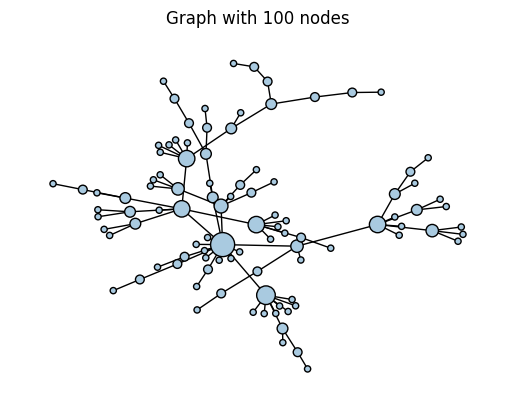

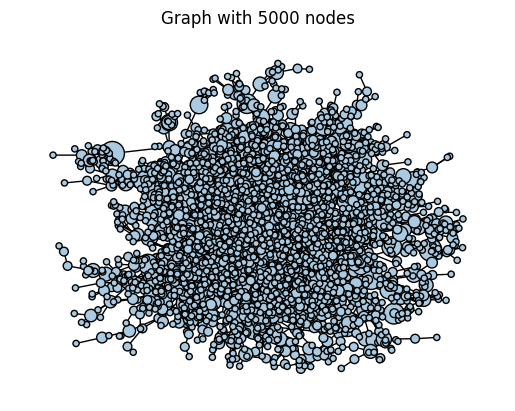

Min degree: 1
Max degree: 64


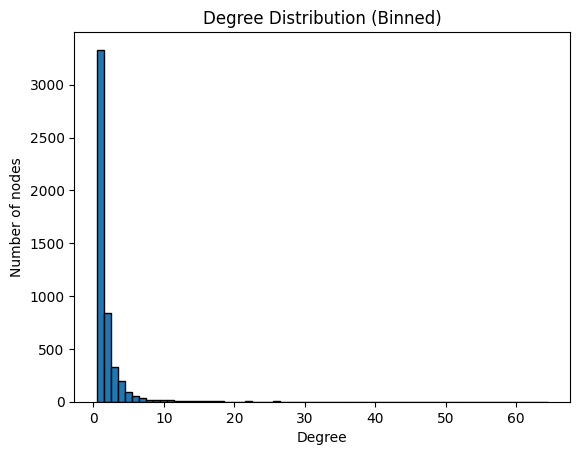

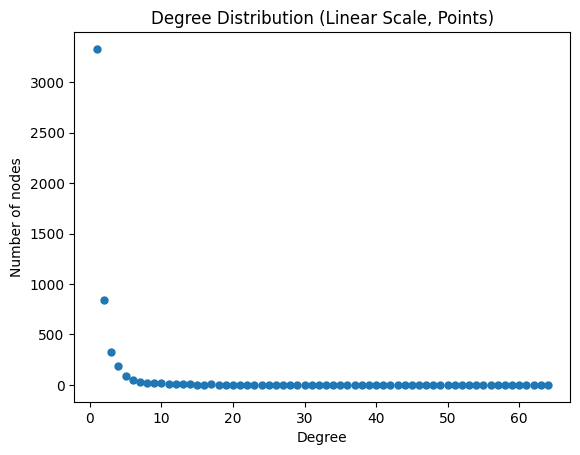

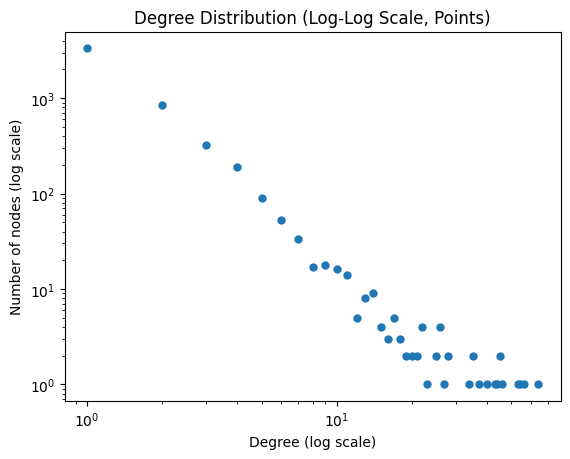

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# Barabasi-Albert graph
BA = nx.Graph()

BA.add_edges_from([(1, 2)])

# Collected degrees (dictionary)
degrees = dict(BA.degree())
node_sizes = []

# print(BA)
# print(degrees)


def preferential_attachment():
    global degrees
    global node_sizes

    # Get total degree sum
    total_degree = sum(degrees.values())

    # Calculate connection probabilities
    probabilities = [degrees[node] / total_degree for node in BA.nodes()]

    # Node chosen based on preferential attachment
    chosen_node = np.random.choice(list(BA.nodes()), p=probabilities)

    # Add and connect new node to chosen node
    new_node = max(BA.nodes()) + 1
    BA.add_edge(new_node, chosen_node)

    # Update degrees dictionary
    degrees = dict(BA.degree())
    node_sizes = [degrees[node] * 20 for node in BA.nodes()]

    return node_sizes


# 100 node network
for i in range(98):
    preferential_attachment()

# Info about graph and its degrees
# print(BA)
# print(degrees)

# Plotting 100 node graph
plt.figure()
plt.title("Graph with 100 nodes")
nx.draw(BA, node_size=node_sizes, node_color="#a9cae0", edgecolors="black")
plt.show()
# Image("ba-model-100-nodes.png")

# 5000 node network
for i in range(4900):
    preferential_attachment()

# Info about graph and its degrees
# print(BA)
# print(degrees)

# Plotting 5000 node graph
plt.figure()
plt.title("Graph with 5000 nodes")
nx.draw(BA, node_size=node_sizes, node_color="#a9cae0", edgecolors="black")
plt.show()
# Image("ba-model-100-nodes.png")

print("Min degree:", min(degrees.values()))
print("Max degree:", max(degrees.values()))

# Bin degree distribution with np.histogram
degree_values = list(degrees.values())
bins = np.arange(min(degree_values), max(degree_values) + 2) - 0.5  # bin edges for integer degrees
hist, bin_edges = np.histogram(degree_values, bins=bins)

# Plot degree distribution
plt.figure()
plt.bar(bin_edges[:-1] + 0.5, hist, width=1, edgecolor='black')
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.title("Degree Distribution (Binned)")
plt.show()

# Plot degree distribution: linear axes (points)
plt.figure()
plt.plot(bin_edges[:-1] + 0.5, hist, 'o', markersize=5)
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.title("Degree Distribution (Linear Scale, Points)")
plt.show()

# Plot degree distribution: log-log axes (points)
plt.figure()
plt.plot(bin_edges[:-1] + 0.5, hist, 'o', markersize=5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree (log scale)")
plt.ylabel("Number of nodes (log scale)")
plt.title("Degree Distribution (Log-Log Scale, Points)")
plt.show()